# Universal scaling for oxides and TMs
From Wang Gao et al paper "determining the adsorption energies of small molecules with intrinsic properties of adsorbates and substrates" 

The overall scheme is to scale based on geometry with a modified coordination number $\overline{CN}$ and an electronic parameter $\Psi$

$\Delta E_{ad} = 0.1*\frac{X_{m}-X}{X_{m}+1}*\psi+0.2*\frac{X+1}{X_{m}+1}*\overline{CN}+\theta$

In [5]:
import yaml
import os

In [126]:
# the enhanced coordination number for various sites. AD = adatoms
coord_num_dict = {
    "111_bulk": 12, 
    "100_bulk": 8,
    "211_bulk": 7,
    "2AD@211": 1.667,
    "1AD@111": 2.500, 
    "2AD@111": 2.917, 
    "1AD@100": 3.000, 
    "3AD@111": 3.500, 
    "2AD@100": 3.583, 
    "4AD@100": 4.417, 
    "211 KSE (CN=6)": 4.667, 
    "532 T": 4.750, 
    "211 SE": 5.500, 
    "553 SE": 5.500, 
    "711 SE": 5.500, 
    "110 SE": 5.833, 
    "211 KSE (CN=8)": 6.417, 
    "100 T (hollow)": 6.615, 
    "100 T": 6.667, 
    "111 T (FCC-hollow)": 6.955, 
    "111 T": 7.500, 
    "cavity 111": 8.000,
}


## from supp matl in calle vallejo paper: 

Moreover, generalized coordination numbers have also been calculated for bridge and hollow sites, as shown in Tables S.3 and S.4. The values for cn are taken as the arithmetic average of the values in Table S.1. In that way, the usual coordination number (cn) of a (100) edge, which is formed by a purely (100)edge atom and a kink atom, is (7 + 6) / 2 = 6.5. The values for the hollow sites are estimated likewise. On the other hand, generalized coordination numbers for bridge sites are taken as the weighted average of the nearest neighbors of the two atoms forming the bridge, avoiding double counting, and using 18 a

3 normalizing factor, which is the maximum coordination number of twofold sites in the bulk. Similarly, generalized coordination numbers for hollow sites are taken as the weighted average of the nearest neighbors of the three (in (111) facets) or four (in the (100) facets) atoms forming the hollow, avoiding double counting, and using 22 (for (111) facets) and 26 (for (100) facets) as normalizing factors, which are the maximum coordination numbers of threefold and fourfold sites in the bulk.

basically, for different site types, the coordination number is pretty simple on the bulk surface. [ref calle vallejo 2015](https://www.nature.com/articles/nchem.2226) 
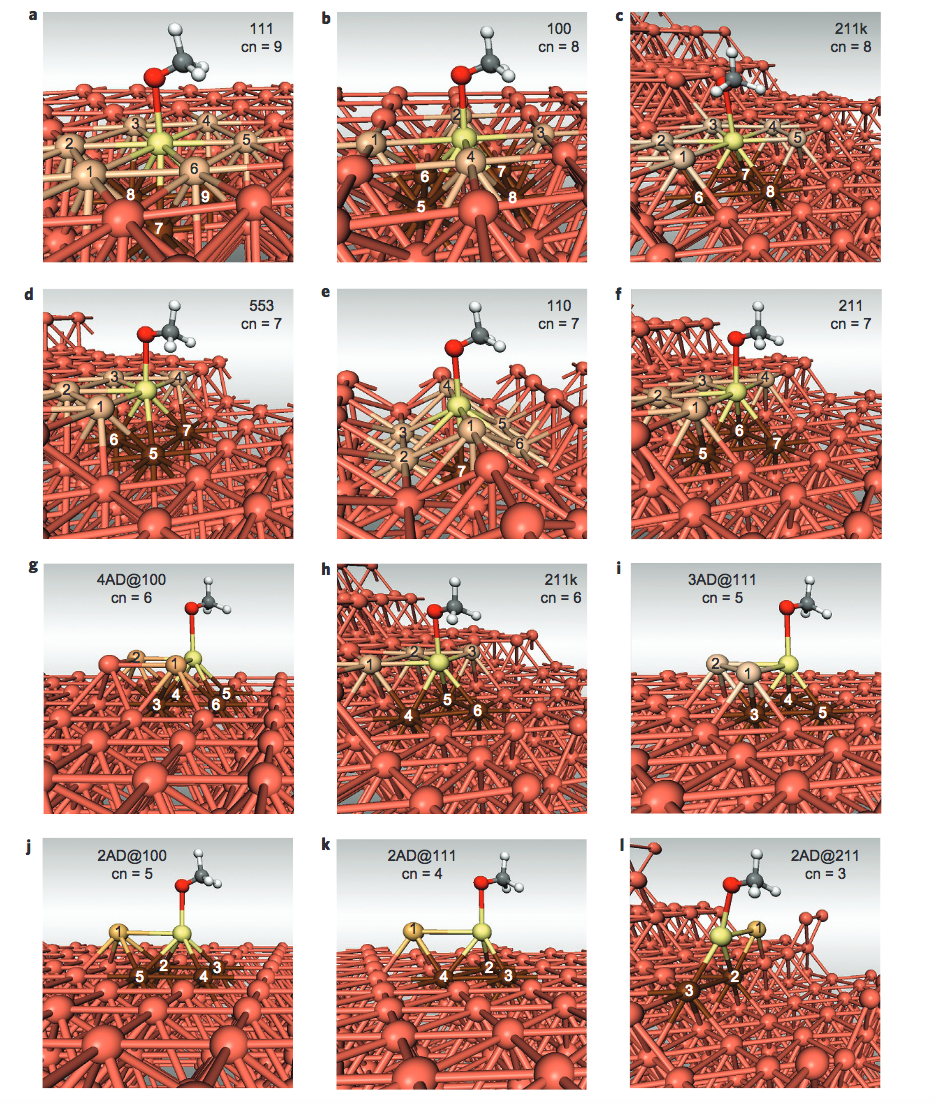

In [7]:
# from supp material in https://doi.org/10.1038/s41467-020-14969-8 (Wang Gao et al)
# numbers are the valence electron number, the pauling electronegativity, and the Psi defined above
metal_dict = {
    "Sc": [3, 1.36, 6.62],
    "Ti": [4, 1.54, 10.39], 
    "V": [5, 1.63, 15.34], 
    "Cr": [6, 1.66, 21.69], 
    "Mn": [7, 1.55, 31.61], 
    "Fe": [8, 1.83, 34.97], 
    "Co": [9, 1.88, 43.09], 
    "Ni": [10, 1.91, 52.36], 
    "Cu": [11, 1.90, 63.68], 
    "Zn": [12, 1.65, 87.27], 
    "Y": [3, 1.22, 7.38], 
    "Zr": [4, 1.33, 12.03], 
    "Nb": [5, 1.60, 15.63], 
    "Mo": [6, 1.16, 31.03], 
    "Tc": [7, 1.90, 25.79], 
    "Ru": [8, 2.20, 29.09], 
    "Rh": [9, 2.28, 35.53], 
    "Pd": [10, 2.20, 45.45], 
    "Ag": [11, 1.93, 87.10],
    "Cd": [12, 1.69, 85.21], 
    "La": [3, 1.10, 8.18], 
    "Hf": [4, 1.30, 12.31], 
    "Ta": [5, 1.50, 16.67], 
    "W": [6, 2.36, 15.25], 
    "Re": [7, 1.90, 25.79], 
    "Os": [8, 2.20, 29.09],
    "Ir": [9, 2.20, 36.82], 
    "Pt": [10, 2.28, 43.86],
    "Au": [11, 2.54, 75.92], 
    "Hg": [12, 2.00, 72],
}

metal_phi_file = "./possible_rmg_libs/electronic_file.yaml" 
if not os.path.exists(metal_phi_file):
    with open(metal_phi_file, "w") as f:
        yaml.dump(metal_dict, f)

In [31]:
metal_dict['Pt']
coord_num_dict["111_bulk"]

12

## First, lets try to predict the binding energy of CH3. use Pt111 to get the theta

In [39]:
# get BEs for all metals form rmg metal db
from rmgpy.data.surface import MetalDatabase as mdb
from rmgpy.data.thermo import ThermoDatabase as tdb

In [41]:
mdb_path = "/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-database/input/surface/"
metal_db = mdb()
metal_db.load(mdb_path)

In [44]:
tdb_path = "/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-database/input/thermo/"
thermo_db = tdb()
thermo_db.load(tdb_path, libraries=["surfaceThermoPt111"], surface=True)

In [52]:
cu111_bes = metal_db.get_binding_energies("Cu111")
pt111_bes = metal_db.get_binding_energies("Pt111")

In [53]:
cu111_bes

{'H': (-2.58383,'eV/molecule'),
 'C': (-4.96034,'eV/molecule'),
 'N': (-3.58447,'eV/molecule'),
 'O': (-4.20764,'eV/molecule')}

In [54]:
pt111_bes

{'H': (-2.75368,'eV/molecule'),
 'C': (-7.02516,'eV/molecule'),
 'N': (-4.63225,'eV/molecule'),
 'O': (-3.81153,'eV/molecule')}

scale CH3 using carbon Binding energy from Pt111 to Cu211

In [62]:
# thermo_db.libraries["surfaceThermoPt111"].load_entry("CH3_ads")

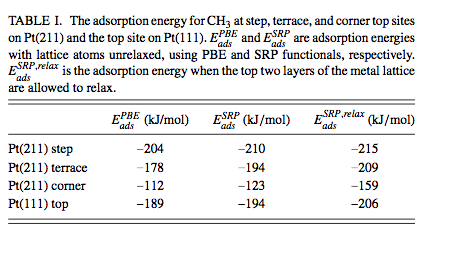

In [66]:
methane_hf = -17.81*(1/23)
methane_hf

-0.7743478260869564

In [70]:
CH3_Pt111_be_ev = -2.1098
CH3_Pt211_be_ev = -2.56055
CH3_Cu211_be_ev = -2.00
print(CH3_Pt111_be_ev, CH3_Pt211_be_ev)

-2.1098 -2.56055


In [61]:
# first, get theta? 
CH3_Pt111_be = -1.770

In [121]:
psi_pt = metal_dict["Au"][2]
psi_cu = metal_dict["Cu"][2]
print(psi_pt, psi_cu)


75.92 63.68


In [78]:
CN_111 = coord_num_dict['111_bulk']
CN_211 = coord_num_dict['211 SE']
print(CN_111, CN_211)

12 5.5


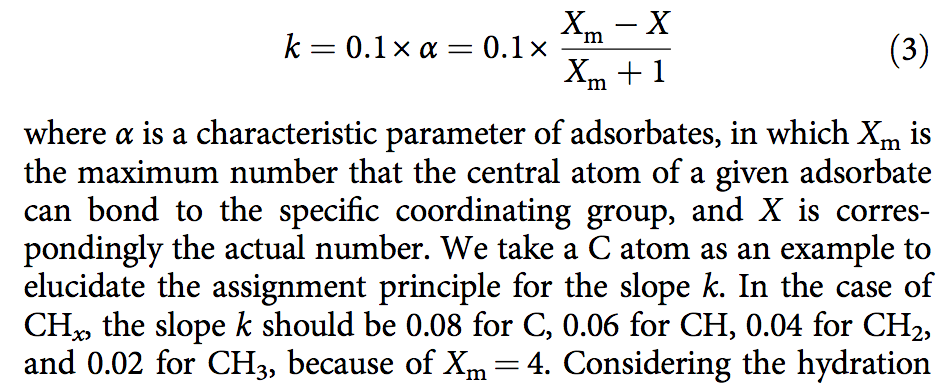

$\Delta E_{ad} = 0.1*\frac{X_{m}-X}{X_{m}+1}*\psi+0.2*\frac{X+1}{X_{m}+1}*\overline{CN}+\theta$

solve for $\theta$

$\theta = \Delta E_{ad} -0.1*\frac{X_{m}-X}{X_{m}+1}*\psi-0.2*\frac{X+1}{X_{m}+1}*\overline{CN}$

In [82]:
Xm = 4
X = 3 # for ch3  

In [83]:
theta = CH3_Pt111_be_ev - 0.1*((Xm-X)/(Xm+1))*psi_pt-0.2*((X+1)/(Xm+1))*CN_111

In [84]:
theta

-4.907

In [85]:
CH3_Pt211_be_ev_test = 0.1*((Xm-X)/(Xm+1))*psi_pt+0.2*((X+1)/(Xm+1))*CN_211+theta

-3.1498

In [139]:
def get_be(
    be_111,
    old_metal = "Pt", 
    old_facet= "111_bulk", 
    new_metal = "Cu", 
    new_facet = "211 SE",
    Xm = 4,
    X = 3,
):
    """
    returns the binding energy for the same species on a new metal/facet. 
    """
    theta = be_111 - 0.1*((Xm-X)/(Xm+1))*metal_dict[old_metal][2]-0.2*((X+1)/(Xm+1))*coord_num_dict[old_facet]
    new_be = 0.1*((Xm-X)/(Xm+1))*metal_dict[new_metal][2]+0.2*((X+1)/(Xm+1))*coord_num_dict[new_facet]+theta
    
    return new_be

In [143]:
CH3_be_ev = -1.60021
old_met = "Ag"
old_fac = "111_bulk"


be_Cu211 = get_be(
    CH3_Pt111_be_ev,     
    old_metal = old_met,
    old_facet= old_fac, 
    new_metal = "Pt", 
    new_facet = "111_bulk",
    Xm = 4,
    X = 3,
)

be_Cu211

-2.9746

In [144]:
metal_dict["Ag"][2]

87.1

In [145]:
metal_dict["Pt"][2]

43.86